[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Positive words


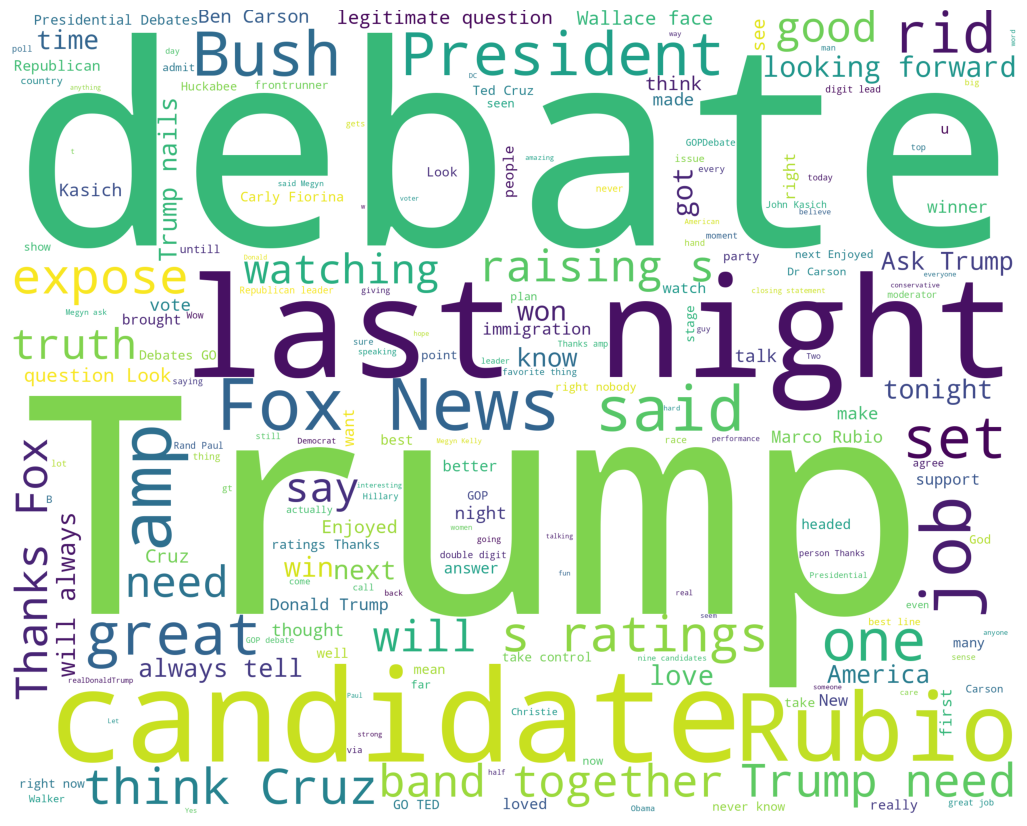

Negative words


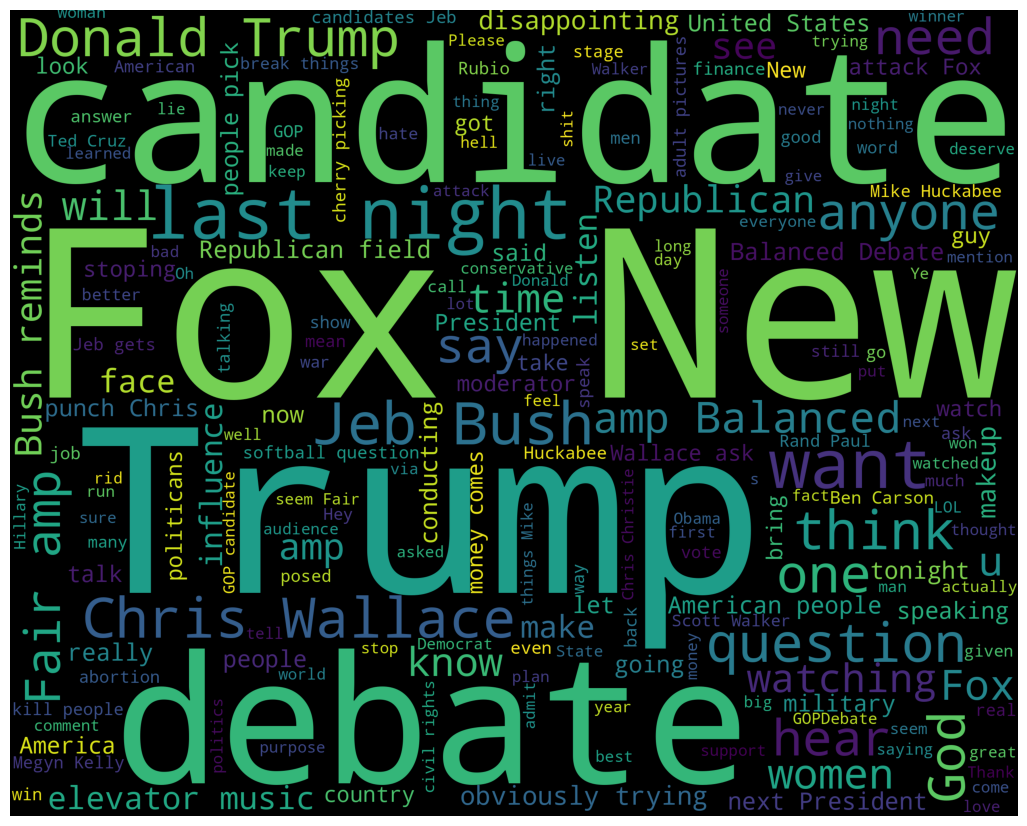

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

data = pd.read_csv('Sentiment.csv')
data = data[['text', 'sentiment']]

train_pos = data[data['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = data[data['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos, 'white')
print("Negative words")
wordcloud_draw(train_neg)

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in data.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = data[data['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = data[data['sentiment'] == 'Negative']
test_neg = test_neg['text']

def get_words_in_tweets(tweets):
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words)
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

training_set = nltk.classify.apply_features(extract_features, tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res = classifier.classify(extract_features(obj.split()))
    if res == 'Negative':
        neg_cnt += 1
        
for obj in test_pos:
    res = classifier.classify(extract_features(obj.split()))
    if res == 'Positive':
        pos_cnt += 1
        
print('[Negative]: %s/%s ' % (len(test_neg), neg_cnt))
print('[Positive]: %s/%s ' % (len(test_pos), pos_cnt))
